In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import pandas as pd

In [ ]:
# Assuming your dataset is stored in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/drive/MyDrive/Final Project/imagesinfo.csv')

In [ ]:
# check null values
df.isnull().sum()

artist            0
date          26363
genre          1254
pixelsx           0
pixelsy           0
size_bytes        0
source          167
style           986
title           122
filename          0
dtype: int64

In [ ]:
df.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,836.jpg


In [ ]:
# remove null value rows
df = df.dropna()

In [ ]:
# check null values
df.isnull().sum()

artist        0
date          0
genre         0
pixelsx       0
pixelsy       0
size_bytes    0
source        0
style         0
title         0
filename      0
dtype: int64

In [ ]:
# Filter rows with a single year format (e.g., "1900") and remove others
single_year_format = df['date'].str.match(r'^\d{4}$')
df = df[single_year_format]

In [ ]:
print(df['date'])

7         1838
10        1844
14        1873
15        1890
16        1838
          ... 
103226    1647
103227    1958
103240    1433
103243    1954
103249    1913
Name: date, Length: 42770, dtype: object


In [ ]:
alpha_artist_format = df['artist'].str.replace(' ', '').str.isalpha()
df = df[alpha_artist_format]
alpha_title_format = df['title'].str.replace(' ', '').str.isalpha()
df = df[alpha_title_format]

In [ ]:
print(df['title'])

7                     Small Bird on a Branch of Kaidozakura
10                                Camellia and Bush Warbler
14                                             Storm at sea
15                                         Seaweed Gatherer
16                                      Two Mandarin Ducks 
                                ...                        
103203                                    Terre assoiffée I
103226    Cupid Ordering Mercury to Announce his Power t...
103227                                      Southwest Image
103240                                 Study of Horse Heads
103243                                      A Cat Named Sam
Name: title, Length: 28311, dtype: object


In [ ]:
df['date'] = pd.to_numeric(df['date'], errors='coerce')


# Define bins for grouping years in intervals of 50 years
bins = range(1600, 2000, 50)


# Create a new column 'Year_Group' indicating the bin for each year
df['Year_Group'] = pd.cut(df['date'], bins=bins, right=False, include_lowest=True)

df = df.dropna()
print(df['Year_Group'])

7         [1800, 1850)
10        [1800, 1850)
14        [1850, 1900)
15        [1850, 1900)
16        [1800, 1850)
              ...     
103140    [1900, 1950)
103174    [1900, 1950)
103181    [1900, 1950)
103191    [1900, 1950)
103226    [1600, 1650)
Name: Year_Group, Length: 22184, dtype: category
Categories (7, interval[int64, left]): [[1600, 1650) < [1650, 1700) < [1700, 1750) < [1750, 1800) <
                                        [1800, 1850) < [1850, 1900) < [1900, 1950)]


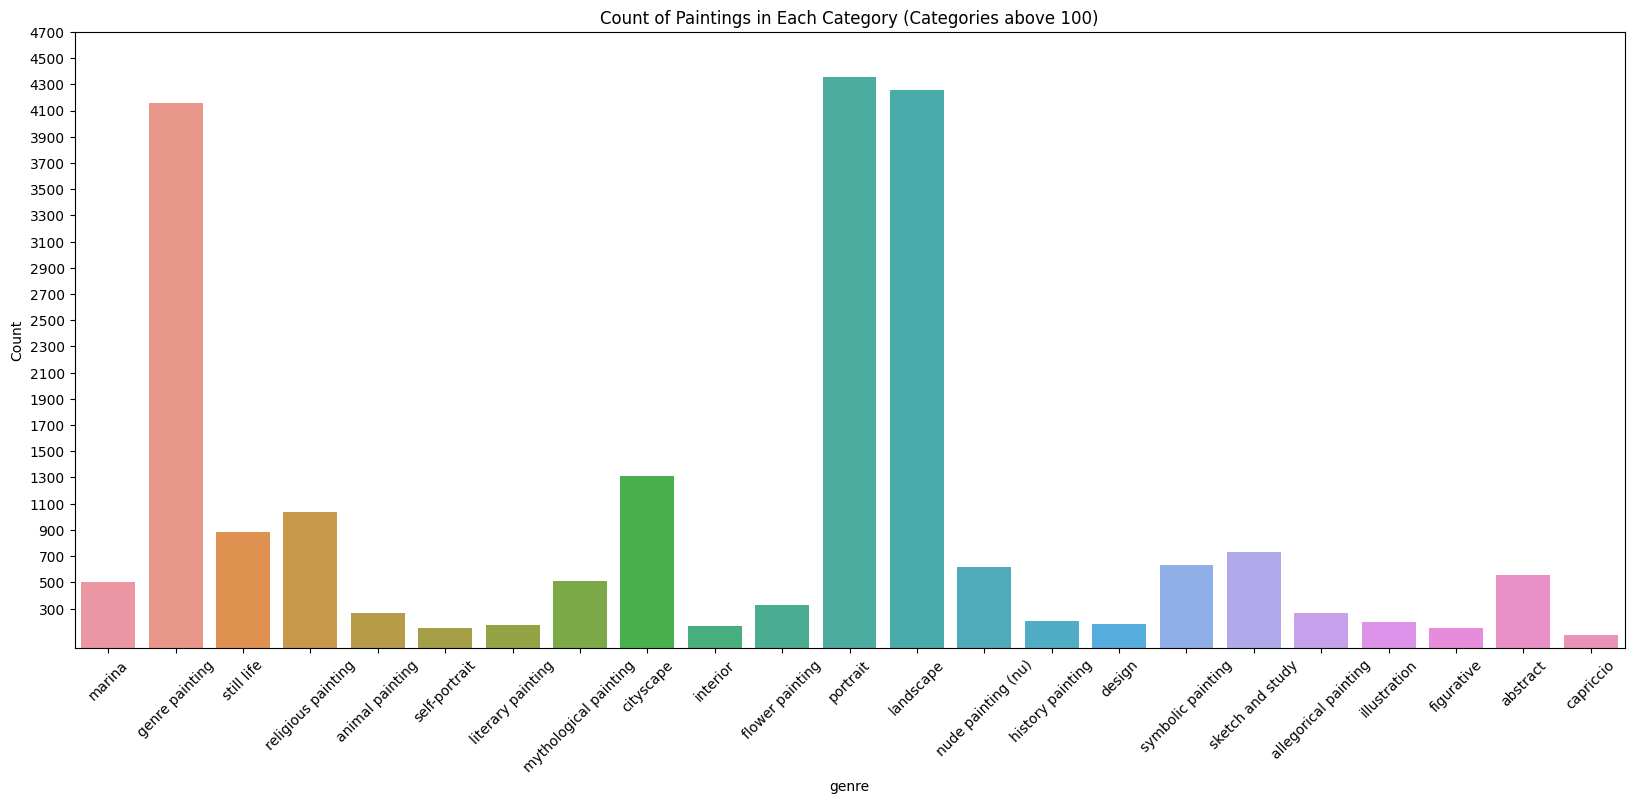

In [ ]:
# Filter categories with counts above 100
categories_above_100 = df['genre'].value_counts()[df['genre'].value_counts() > 100].index

# Count plot of selected categories
plt.figure(figsize=(20, 8))
sns.countplot(x='genre', data=df[df['genre'].isin(categories_above_100)])
plt.title('Count of Paintings in Each Category (Categories above 100)')
plt.xlabel('genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(range(300, 4800, 200))  # Set y-axis labels at intervals of 50, up to 250

plt.show()

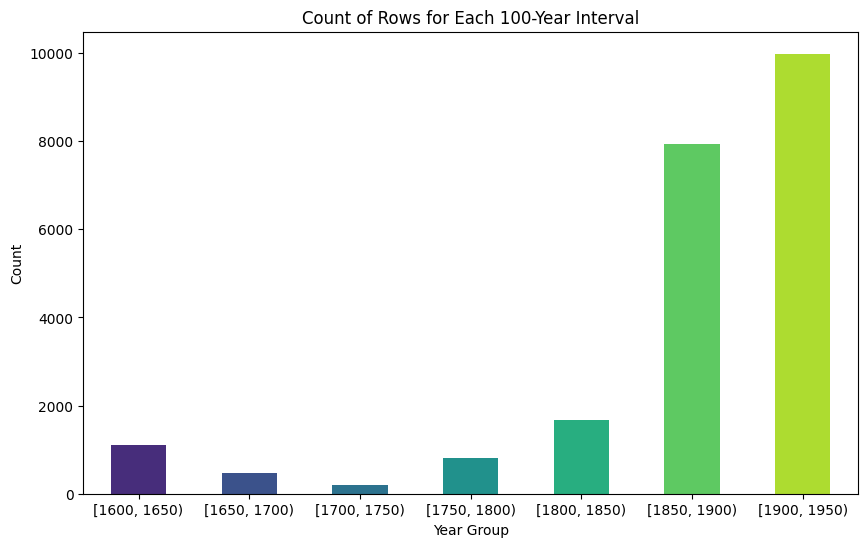

In [ ]:
# Count the number of rows for each year group
rows_count_yearwise = df.groupby('Year_Group').size()

# Define custom colors for each bar
custom_colors = sns.color_palette("viridis", len(rows_count_yearwise))

# Plot the count of rows for each year group
plt.figure(figsize=(10, 6))
rows_count_yearwise.plot(kind='bar', color=custom_colors)
plt.title('Count of Rows for Each 100-Year Interval')
plt.xlabel('Year Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Count the number of occurrences for each artist
top_artists = df['artist'].value_counts().head(10)

# Display the result
print('Top 10 Artists:')
print(top_artists)


Top 10 Artists:
Ivan Aivazovsky     377
Paul Gauguin        366
Vincent van Gogh    350
Martiros Saryan     329
Pablo Picasso       327
Alfred Sisley       318
Rembrandt           306
Nicholas Roerich    304
Claude Monet        287
Henri Matisse       274
Name: artist, dtype: int64


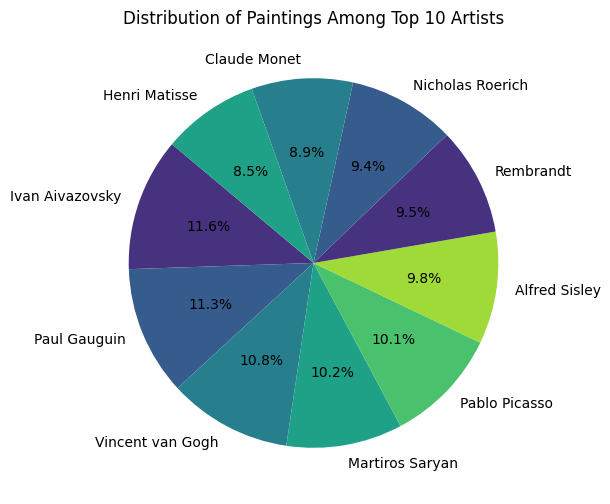

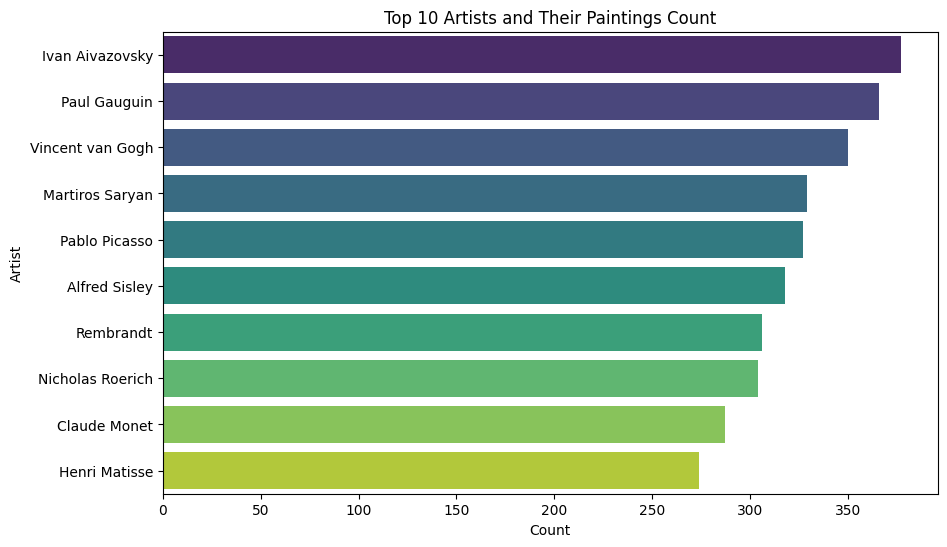

In [ ]:
# Plot the counts of the top 10 artists using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_artists, labels=top_artists.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Paintings Among Top 10 Artists')
plt.show()


# Plot the counts of the top 10 artists using a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title('Top 10 Artists and Their Paintings Count')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

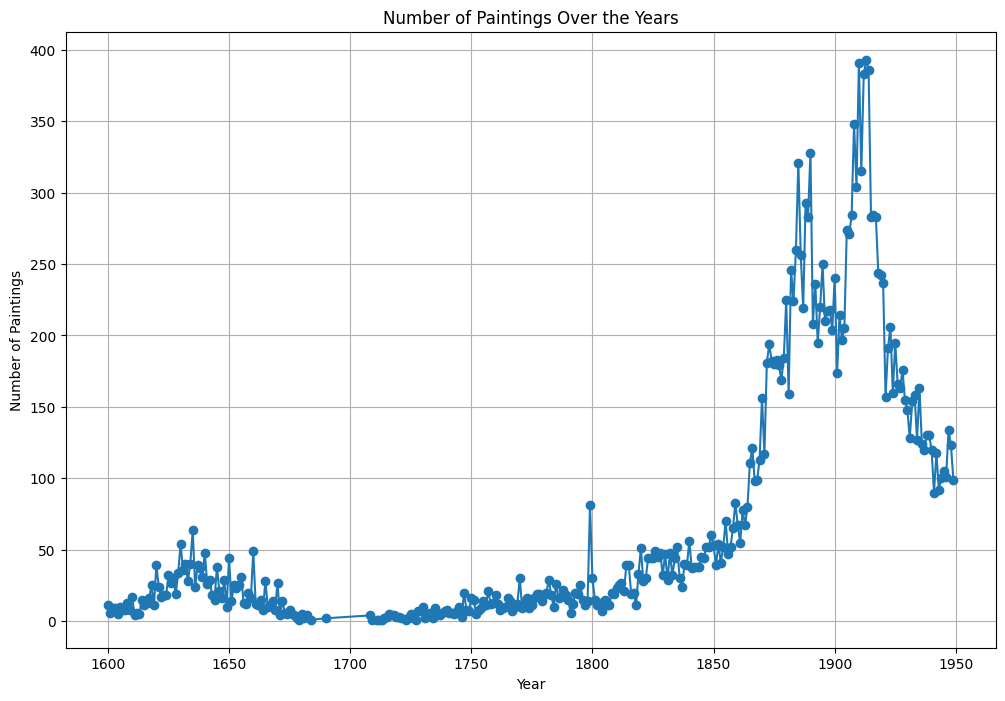

In [ ]:
# Group by 'Year' and count the number of paintings for each year
time_series_data = df['date'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(12, 8))
plt.plot(time_series_data.index, time_series_data.values, marker='o', linestyle='-')
plt.title('Number of Paintings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Paintings')
plt.grid(True)
plt.show()